In [19]:
#Gerekli Kütüphaneleri import ettim
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [20]:
data=pd.read_csv("Diamonds Prices2022.csv")#Data'yı Hazırladım
data.drop("Unnamed: 0",axis=1,inplace=True)
data.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [21]:
#Cut sütununa Onehotencoder yaptım
color_dummy=pd.get_dummies(data["cut"])
data.drop("cut",axis=1,inplace=True)
data=pd.concat([data,color_dummy],axis=1)
data.head()

,carat,color,clarity,depth,table,price,x,y,z,Fair,Good,Ideal,Premium,Very Good
0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0
1,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0
2,0.23,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0
3,0.29,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0
4,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0


In [22]:
#Label Encoder;
le=preprocessing.LabelEncoder()
data["clarity"]=le.fit_transform(data["clarity"])
data.head()

,carat,color,clarity,depth,table,price,x,y,z,Fair,Good,Ideal,Premium,Very Good
0,0.23,E,3,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0
1,0.21,E,2,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0
2,0.23,E,4,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0
3,0.29,I,5,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0
4,0.31,J,3,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0


In [23]:
#Label Encoder
le=preprocessing.LabelEncoder()
data["color"]=le.fit_transform(data["color"])
data.head()

,carat,color,clarity,depth,table,price,x,y,z,Fair,Good,Ideal,Premium,Very Good
0,0.23,1,3,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0
1,0.21,1,2,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0
2,0.23,1,4,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0
3,0.29,5,5,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0
4,0.31,6,3,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0


In [24]:
data.drop("Fair",axis=1,inplace=True)#Fair sütununu kaldırdım
data.shape

(53943, 13)

In [25]:
data.isnull().sum()#Data'da boş değer olup olmadığını inceledim

carat        0
color        0
clarity      0
depth        0
table        0
price        0
x            0
y            0
z            0
Good         0
Ideal        0
Premium      0
Very Good    0
dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53943 non-null  float64
 1   color      53943 non-null  int32  
 2   clarity    53943 non-null  int32  
 3   depth      53943 non-null  float64
 4   table      53943 non-null  float64
 5   price      53943 non-null  int64  
 6   x          53943 non-null  float64
 7   y          53943 non-null  float64
 8   z          53943 non-null  float64
 9   Good       53943 non-null  uint8  
 10  Ideal      53943 non-null  uint8  
 11  Premium    53943 non-null  uint8  
 12  Very Good  53943 non-null  uint8  
dtypes: float64(6), int32(2), int64(1), uint8(4)
memory usage: 3.5 MB


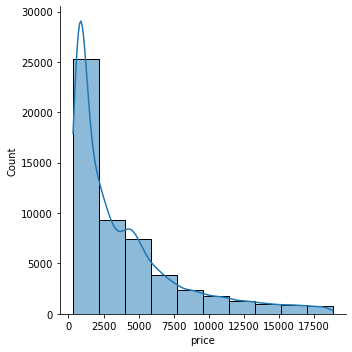

In [27]:
sbn.displot(data.price,kde=True,bins=10);

In [28]:
x=data.drop("price",axis=1)#Bağımısız Değişken
y=data[["price"]]#Bağımlı Değişken

model=sm.OLS(y,x).fit().summary()#Model incelemesi(p-value)
model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                          7.357e+04
Date:                Fri, 05 Aug 2022   Prob (F-statistic):                        0.00
Time:                        21:34:47   Log-Likelihood:                     -4.6512e+05
No. Observations:               53943   AIC:                                  9.303e+05
Df Residuals:                   53931   BIC:                                  9.304e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       1.062e+04     53.853    197.279      0.000    1.05e+04    1.07e+04
color       -267.5691      3.569    -74.966      0.000    -274.565    -260.573
clarity      286.0886      3.463     82.607      0.000     279.301     292.877
depth        -12.0534      2.351     -5.127      0.000     -16.661      -7.445
table          0.7256      2.536      0.286      0.775      -4.245       5.696
x           -924.2187     36.455    -25.352      0.000    -995.671    -852.767
y             65.9319     22.931      2.875      0.004      20.986     110.878
z           -198.3498     38.093     -5.207      0.000    -273.013    -123.687
Good        1043.9073     38.471     27.135      0.000     968.504    1119.311
Ideal       1605.7774     34.821     46.115      0.000    1537.527    1674.027
Premium     1325.4456     35.490     37.347      0.000    1255.884    1395.007
Very Good   1335.1651     35.488     37.623      0.000    1265.608    1404.723
==============================================================================
Omnibus:                    14251.354   Durbin-Watson:                   1.207
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           428309.681
Skew:                           0.649   Prob(JB):                         0.00
Kurtosis:                      16.743   Cond. No.                     1.02e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#p-value'u yüksek olan "table"'ı siliyorum
data.drop("table",axis=1,inplace=True)
x=data.drop("price",axis=1)#Bağımısız Değişken
y=data[["price"]]#Bağımlı Değişken

model=sm.OLS(y,x).fit().summary()#Model incelemesi(p-value)
model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                          8.026e+04
Date:                Fri, 05 Aug 2022   Prob (F-statistic):                        0.00
Time:                        21:34:47   Log-Likelihood:                     -4.6512e+05
No. Observations:               53943   AIC:                                  9.303e+05
Df Residuals:                   53932   BIC:                                  9.304e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       1.062e+04     51.635    205.668      0.000    1.05e+04    1.07e+04
color       -267.5714      3.569    -74.968      0.000    -274.567    -260.576
clarity      286.1461      3.457     82.764      0.000     279.370     292.923
depth        -11.5196      1.430     -8.053      0.000     -14.323      -8.716
x           -920.4545     33.997    -27.074      0.000    -987.089    -853.820
y             66.2099     22.911      2.890      0.004      21.305     111.115
z           -201.5575     36.405     -5.536      0.000    -272.913    -130.202
Good        1044.7977     38.345     27.248      0.000     969.642    1119.953
Ideal       1604.9285     34.694     46.259      0.000    1536.927    1672.930
Premium     1326.6263     35.249     37.636      0.000    1257.538    1395.715
Very Good   1335.7393     35.431     37.699      0.000    1266.294    1405.185
==============================================================================
Omnibus:                    14253.566   Durbin-Watson:                   1.207
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           427737.539
Skew:                           0.649   Prob(JB):                         0.00
Kurtosis:                      16.734   Cond. No.                         753.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [31]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression().fit(x_train,y_train.values.ravel())
print(f"R-Kare Değeri: {r2_score(y_test,lr.predict(x_test))}")
mse=mean_absolute_error(y_test,lr.predict(x_test))
print(f"mse değeri: {mse}")

R-Kare Değeri: 0.89011463140914
mse değeri: 852.6927191245913


In [32]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dc=DecisionTreeRegressor(random_state=42).fit(x_train,y_train)
print(f"R-Kare Değeri: {r2_score(y_test,dc.predict(x_test))}")
mse=mean_absolute_error(y_test,dc.predict(x_test))
print(f"mse değeri: {mse}")

R-Kare Değeri: 0.9637010200857725
mse değeri: 364.8607798306865


In [33]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=10).fit(x_train,y_train.values.ravel())
print(f"R-Kare Değeri: {r2_score(y_test,rf.predict(x_test))}")
mse=mean_absolute_error(y_test,rf.predict(x_test))
print(f"mse değeri: {mse}")
print("-"*100)
#n_estimators en optimum değerini bulmak
r2_deger=0
mse2_deger=0
for i in range(1,11,1):
    rf=RandomForestRegressor(n_estimators=i,random_state=42).fit(x_train,y_train.values.ravel())
    r2=r2_score(y_test,rf.predict(x_test))
    if r2 > r2_deger:
        r2_deger=r2
        print(f"Şimdilik En Yüksek R-Kare Sonucu: {r2_deger},n_estimators sayısı: {i}")
        print("-"*100)
#en optimum n_estimators değeri:10

R-Kare Değeri: 0.9788979312380546
mse değeri: 285.4470132531787
----------------------------------------------------------------------------------------------------
Şimdilik En Yüksek R-Kare Sonucu: 0.9627535906383029,n_estimators sayısı: 1
----------------------------------------------------------------------------------------------------
Şimdilik En Yüksek R-Kare Sonucu: 0.9723904277868075,n_estimators sayısı: 2
----------------------------------------------------------------------------------------------------
Şimdilik En Yüksek R-Kare Sonucu: 0.9752201444967559,n_estimators sayısı: 3
----------------------------------------------------------------------------------------------------
Şimdilik En Yüksek R-Kare Sonucu: 0.9764466287795759,n_estimators sayısı: 4
----------------------------------------------------------------------------------------------------
Şimdilik En Yüksek R-Kare Sonucu: 0.9776837409223765,n_estimators sayısı: 5
---------------------------------------------------

In [34]:
#Ada AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(random_state=42).fit(x_train,y_train.values.ravel())
print(f"R-Kare Değeri: {r2_score(y_test,abr.predict(x_test))}")
mse=mean_absolute_error(y_test,abr.predict(x_test))
print(f"mse değeri: {mse}")


R-Kare Değeri: 0.8916122442092002
mse değeri: 994.0860723134501


In [35]:
#XGBOOST
import xgboost as xg
xgb=xg.XGBRegressor()
xgb.fit(x_train,y_train.values.ravel())
print(f"R-Kare Değeri: {r2_score(y_test,xgb.predict(x_test))}")
mse=mean_absolute_error(y_test,xgb.predict(x_test))
print(f"mse değeri: {mse}")

print("-"*100)

#Boyut indirgeme işlemi ve XGBOOST
pca=PCA(n_components=4)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)
xgb2=xg.XGBRegressor().fit(x_train,y_train)
print(f"Boyut İndirgeme | R-Kare Değeri: {r2_score(y_test,xgb2.predict(x_test))}")
mse=mean_absolute_error(y_test,xgb2.predict(x_test))
print(f"Boyut İndirgeme | mse değeri: {mse}")


R-Kare Değeri: 0.9813111952496028
mse değeri: 276.6853306118611
----------------------------------------------------------------------------------------------------
Boyut İndirgeme | R-Kare Değeri: 0.9667298106071402
Boyut İndirgeme | mse değeri: 402.94022904852005
